In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.api import VAR
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

## Loading the Data and creating sub sets

In [23]:
df = pd.read_csv('main_data.csv')

In [24]:
df_sentiment = pd.read_csv('main_data_cut_for_sentiment.csv')

Loading Loop 1 aka econ_data

In [25]:
econ_data = df[[
'Date', 'GDP', 'GPDI', 'NETEXP', 'GovTotExp', 'ImpGoServ',
'ExpGoServ', 'Unempl', 'PCE', 'ProPriceInd', '10yIntRate', 'GloWheat',
'GloUranium', 'GloPalmOil', 'GloBrentCrude', 'Real_Estate_Loans', 'SP500',
'Dow_Jones_Target', 'NASDAQ', 'Federal_Debt', 'Weekday_Sin', 'Weekday_Cos',
]]


Loading Loop 2 aka econ_weather_data

In [26]:
econ_weather_data = df[[
'Date', 'GDP', 'GPDI', 'NETEXP', 'GovTotExp', 'ImpGoServ',
'ExpGoServ', 'Unempl', 'PCE', 'ProPriceInd', '10yIntRate', 'GloWheat',
'GloUranium', 'GloPalmOil', 'GloBrentCrude', 'Real_Estate_Loans', 'SP500',
'Dow_Jones_Target', 'NASDAQ', 'Federal_Debt', 'temperature_2m_mean (°C) NY', 'daylight_duration (s) NY',
'rain_sum (mm) NY', 'snowfall_sum (cm) NY',
'wind_speed_10m_max (km/h) NY', 'temperature_2m_mean (°C) LA',
'daylight_duration (s) LA', 'rain_sum (mm) LA', 'snowfall_sum (cm) LA',
'wind_speed_10m_max (km/h) LA', 'temperature_2m_mean (°C) CH',
'daylight_duration (s) CH', 'rain_sum (mm) CH', 'snowfall_sum (cm) CH',
'wind_speed_10m_max (km/h) CH', 'temperature_2m_mean (°C) SF',
'daylight_duration (s) SF', 'rain_sum (mm) SF', 'snowfall_sum (cm) SF',
'wind_speed_10m_max (km/h) SF', 'temperature_2m_mean (°C) HU',
'daylight_duration (s) HU', 'rain_sum (mm) HU', 'snowfall_sum (cm) HU',
'wind_speed_10m_max (km/h) HU', 'temperature_2m_mean (°C) DL',
'daylight_duration (s) DL', 'rain_sum (mm) DL', 'snowfall_sum (cm) DL',
'wind_speed_10m_max (km/h) DL', 'temperature_2m_mean (°C) WA',
'daylight_duration (s) WA', 'rain_sum (mm) WA', 'snowfall_sum (cm) WA',
'wind_speed_10m_max (km/h) WA', 'temperature_2m_mean (°C) AT',
'daylight_duration (s) AT', 'rain_sum (mm) AT', 'snowfall_sum (cm) AT',
'wind_speed_10m_max (km/h) AT', 'temperature_2m_mean (°C) SE',
'daylight_duration (s) SE', 'rain_sum (mm) SE', 'snowfall_sum (cm) SE',
'wind_speed_10m_max (km/h) SE', 'Weekday_Sin', 'Weekday_Cos'
]]

Loading Loop 3

In [27]:
econ_weather_google_data = df[[
        'Date', 'Apple', 'Facebook', 'Health', 'Inlfation', 'Pizza', 'Prices',
       'Twitter', 'War', 'Crisi', 'GDP (Google_search)', 'Dollar', 'Election',
       'Income', 'Taxes', 'weather', 'Storm', 'Social Media', 'Trade',
       'Attack', 'Fake News', 'Donald Trump', 'Delivery', 'Stocks', 'Politics',
       'COVID-19', 'Loans', 'GDP', 'GPDI', 'NETEXP', 'GovTotExp', 'ImpGoServ',
       'ExpGoServ', 'Unempl', 'PCE', 'ProPriceInd', '10yIntRate', 'GloWheat',
       'GloUranium', 'GloPalmOil', 'GloBrentCrude',
       'temperature_2m_mean (°C) NY', 'daylight_duration (s) NY',
       'rain_sum (mm) NY', 'snowfall_sum (cm) NY',
       'wind_speed_10m_max (km/h) NY', 'temperature_2m_mean (°C) LA',
       'daylight_duration (s) LA', 'rain_sum (mm) LA', 'snowfall_sum (cm) LA',
       'wind_speed_10m_max (km/h) LA', 'temperature_2m_mean (°C) CH',
       'daylight_duration (s) CH', 'rain_sum (mm) CH', 'snowfall_sum (cm) CH',
       'wind_speed_10m_max (km/h) CH', 'temperature_2m_mean (°C) SF',
       'daylight_duration (s) SF', 'rain_sum (mm) SF', 'snowfall_sum (cm) SF',
       'wind_speed_10m_max (km/h) SF', 'temperature_2m_mean (°C) HU',
       'daylight_duration (s) HU', 'rain_sum (mm) HU', 'snowfall_sum (cm) HU',
       'wind_speed_10m_max (km/h) HU', 'temperature_2m_mean (°C) DL',
       'daylight_duration (s) DL', 'rain_sum (mm) DL', 'snowfall_sum (cm) DL',
       'wind_speed_10m_max (km/h) DL', 'temperature_2m_mean (°C) WA',
       'daylight_duration (s) WA', 'rain_sum (mm) WA', 'snowfall_sum (cm) WA',
       'wind_speed_10m_max (km/h) WA', 'temperature_2m_mean (°C) AT',
       'daylight_duration (s) AT', 'rain_sum (mm) AT', 'snowfall_sum (cm) AT',
       'wind_speed_10m_max (km/h) AT', 'temperature_2m_mean (°C) SE',
       'daylight_duration (s) SE', 'rain_sum (mm) SE', 'snowfall_sum (cm) SE',
       'wind_speed_10m_max (km/h) SE', 'Real_Estate_Loans', 'SP500',
       'Dow_Jones_Target', 'NASDAQ', 'Federal_Debt', 'Weekday_Sin', 'Weekday_Cos'
       ]]

Loading Loop 4

In [28]:
sentiment = df_sentiment[['Date', 'Apple', 'Facebook', 'Health', 'Inlfation', 'Pizza', 'Prices',
       'Twitter', 'War', 'Crisi', 'GDP (Google_search)', 'Dollar', 'Election',
       'Income', 'Taxes', 'weather', 'Storm', 'Social Media', 'Trade',
       'Attack', 'Fake News', 'Donald Trump', 'Delivery', 'Stocks', 'Politics',
       'COVID-19', 'Loans', 'GDP', 'GPDI', 'NETEXP', 'GovTotExp', 'ImpGoServ',
       'ExpGoServ', 'Unempl', 'PCE', 'ProPriceInd', '10yIntRate', 'GloWheat',
       'GloUranium', 'GloPalmOil', 'GloBrentCrude',
       'temperature_2m_mean (°C) NY', 'daylight_duration (s) NY',
       'rain_sum (mm) NY', 'snowfall_sum (cm) NY',
       'wind_speed_10m_max (km/h) NY', 'temperature_2m_mean (°C) LA',
       'daylight_duration (s) LA', 'rain_sum (mm) LA', 'snowfall_sum (cm) LA',
       'wind_speed_10m_max (km/h) LA', 'temperature_2m_mean (°C) CH',
       'daylight_duration (s) CH', 'rain_sum (mm) CH', 'snowfall_sum (cm) CH',
       'wind_speed_10m_max (km/h) CH', 'temperature_2m_mean (°C) SF',
       'daylight_duration (s) SF', 'rain_sum (mm) SF', 'snowfall_sum (cm) SF',
       'wind_speed_10m_max (km/h) SF', 'temperature_2m_mean (°C) HU',
       'daylight_duration (s) HU', 'rain_sum (mm) HU', 'snowfall_sum (cm) HU',
       'wind_speed_10m_max (km/h) HU', 'temperature_2m_mean (°C) DL',
       'daylight_duration (s) DL', 'rain_sum (mm) DL', 'snowfall_sum (cm) DL',
       'wind_speed_10m_max (km/h) DL', 'temperature_2m_mean (°C) WA',
       'daylight_duration (s) WA', 'rain_sum (mm) WA', 'snowfall_sum (cm) WA',
       'wind_speed_10m_max (km/h) WA', 'temperature_2m_mean (°C) AT',
       'daylight_duration (s) AT', 'rain_sum (mm) AT', 'snowfall_sum (cm) AT',
       'wind_speed_10m_max (km/h) AT', 'temperature_2m_mean (°C) SE',
       'daylight_duration (s) SE', 'rain_sum (mm) SE', 'snowfall_sum (cm) SE',
       'wind_speed_10m_max (km/h) SE', 'Real_Estate_Loans', 'SP500',
       'Dow_Jones_Target', 'NASDAQ', 'Federal_Debt', 'Weekday_Sin', 'Weekday_Cos', 
       'neg', 'pos', 'neu', 'compound']]

## Loop 1 (baseline)

In [29]:
econ_data.reset_index(inplace=True)

In [30]:
Date_col_1 = econ_data['Date'].tail(521) #dependet on the lentgh of the split_index

In [31]:
columns_1 = ['GDP', 'GPDI', 'NETEXP', 'GovTotExp', 'ImpGoServ', 'ExpGoServ', 'Unempl', 'PCE', \
             'ProPriceInd', '10yIntRate', 'GloWheat', 'GloUranium', 'GloPalmOil', 'Real_Estate_Loans', \
             'SP500','Dow_Jones_Target', 'NASDAQ', 'Federal_Debt', 'Weekday_Sin', 'Weekday_Cos']

data_diff_l1 = econ_data[columns_1]

split_index_l1 = int(len(data_diff_l1) * 0.85) #this determines the lentgh of the forecast, according to this I can adjust the Date_col lentgh
train_data_l1 = data_diff_l1.iloc[:split_index_l1]
test_data_l1 = data_diff_l1.iloc[split_index_l1:]

model_l1 = VAR(train_data_l1)
results_l1 = model_l1.fit(maxlags=2820) #resulting from the grangercausalitytests --> for GDP = maxlags=87////2820

forecast_steps = len(test_data_l1)
forecast_1 = results_l1.forecast(train_data_l1.values[-results_l1.k_ar:], steps=forecast_steps)


forecast_df = pd.DataFrame(forecast_1, index=test_data_l1.index, columns=columns_1)


dowjones_forecast_l1 = forecast_df['Dow_Jones_Target']
dowjones_actual_l1 = test_data_l1['Dow_Jones_Target']

dates = data_diff_l1.index[split_index_l1:]


comparison_df_l1 = pd.DataFrame({'Date': Date_col_1, 'Actual Down Jones': dowjones_actual_l1.values, 'Forecasted Down Jones': dowjones_forecast_l1.values}) #'Date': Date_col, 'Actual GDP': gdp_actual.values
comparison_df_l1.dropna(inplace=True)

MAE: 1169.63
MAPE: 0.03%
Dow Jones Actual vs Forecast:
            Date  Actual Down Jones  Forecasted Down Jones
2950  2022-10-29           32861.80           32900.277166
2951  2022-10-30           32861.80           32898.020529
2952  2022-10-31           32732.95           32886.199383
2953  2022-11-01           32653.20           32847.176786
2954  2022-11-02           32147.76           32823.590063
...          ...                ...                    ...
3466  2024-03-28           39807.37           34893.951421
3467  2024-03-29           39807.37           34945.272341
3468  2024-03-30           39807.37           34823.545619
3469  2024-03-31           39807.37           34613.051202
3470  2024-04-01           39566.85           34691.009965

[521 rows x 3 columns]


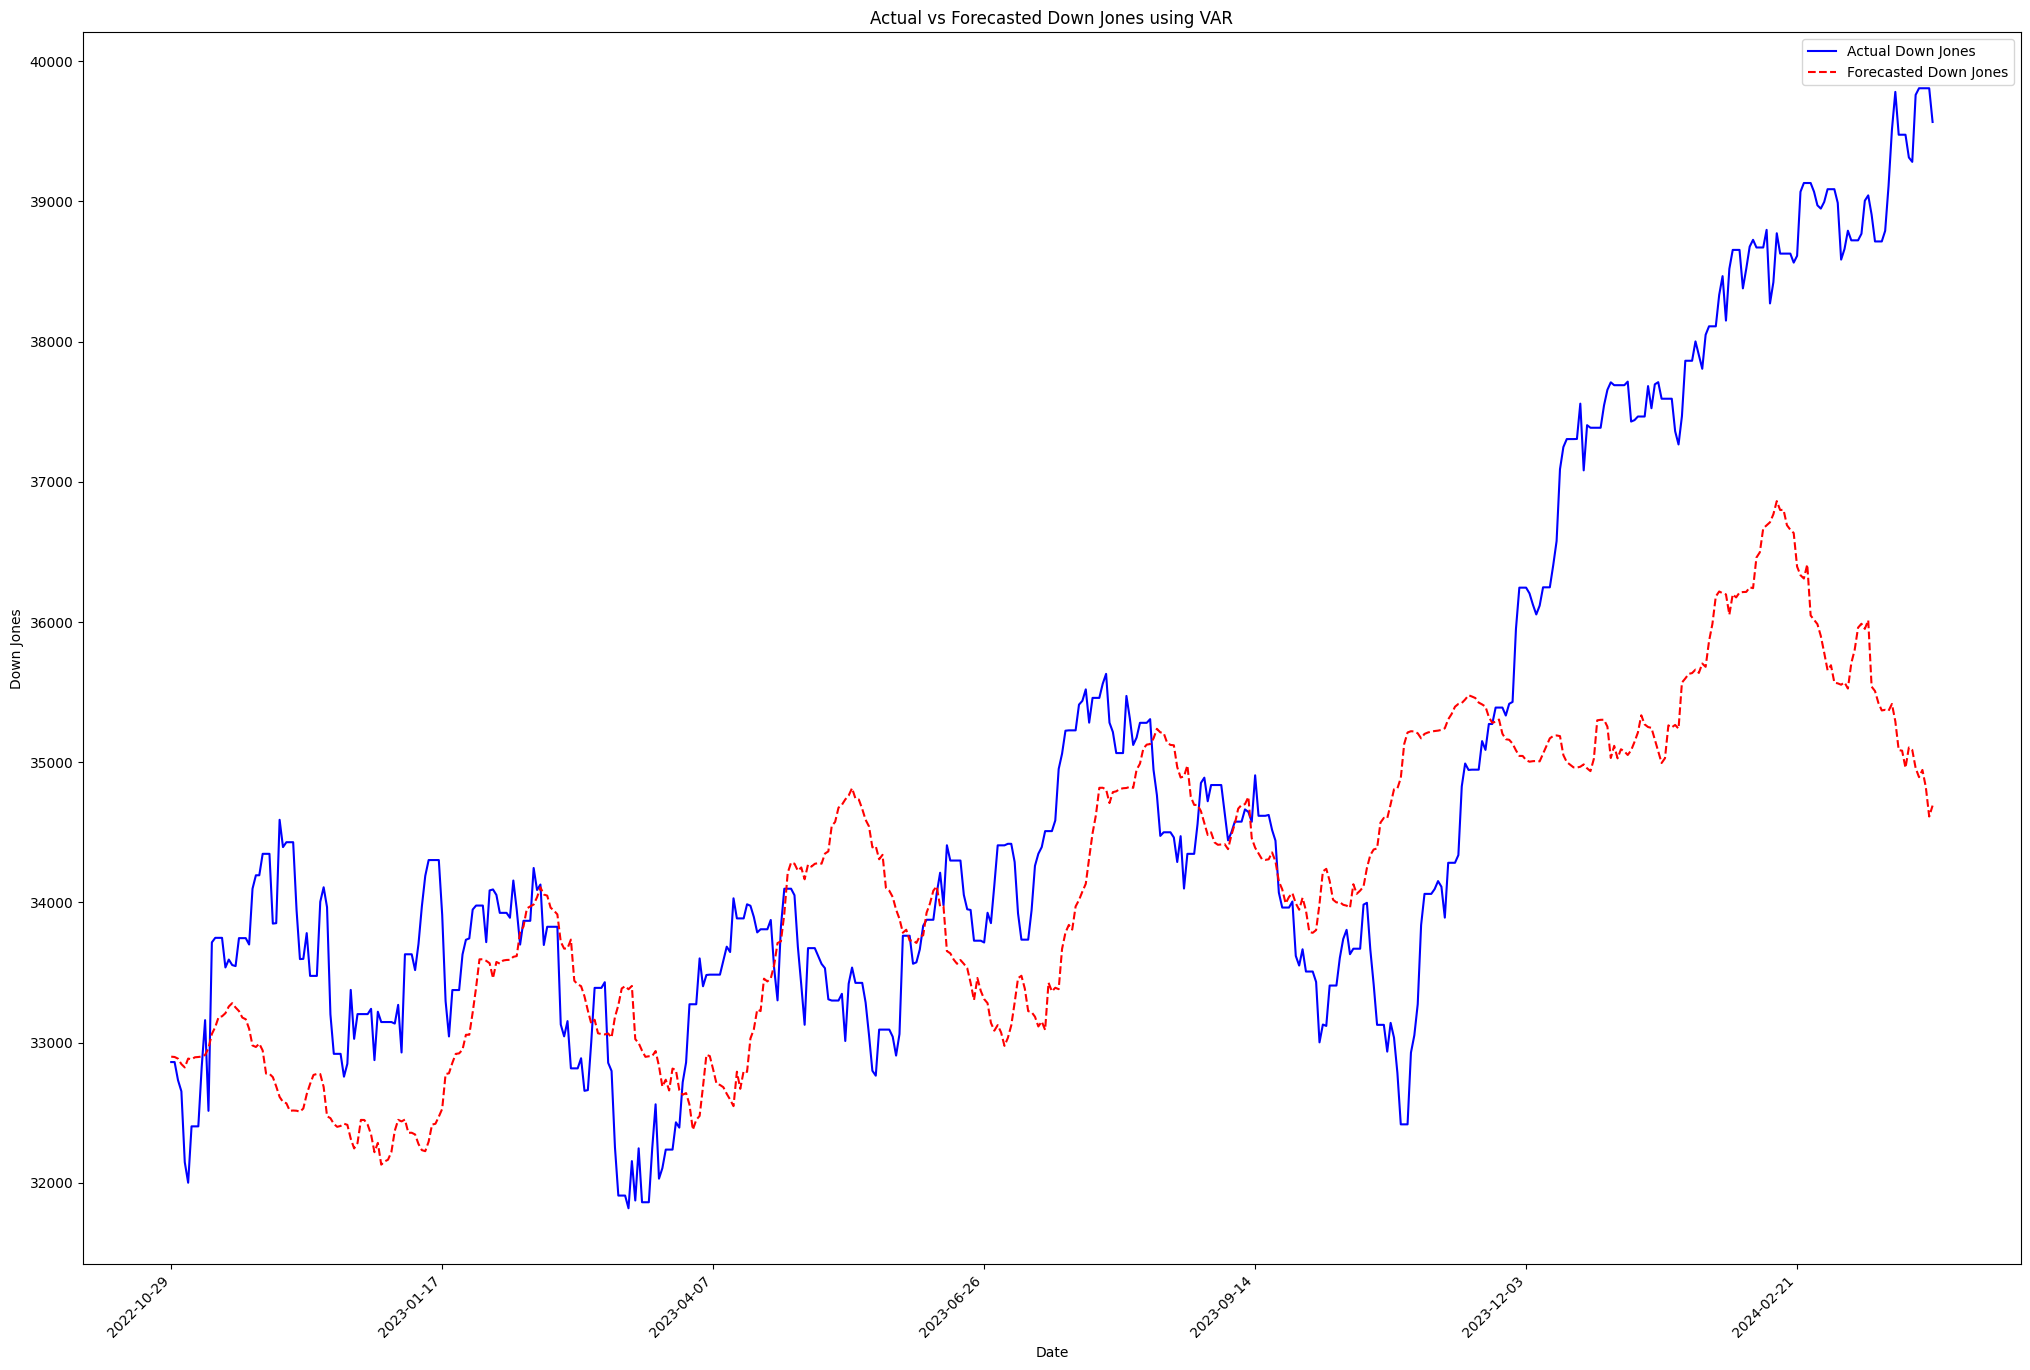

In [32]:
mae = mean_absolute_error(comparison_df_l1['Actual Down Jones'], comparison_df_l1['Forecasted Down Jones'])
print(f"MAE: {mae:.2f}")

mape = mean_absolute_percentage_error(comparison_df_l1['Actual Down Jones'], comparison_df_l1['Forecasted Down Jones'])
print(f"MAPE: {mape:.2f}%")


print("Dow Jones Actual vs Forecast:")
print(comparison_df_l1)

plt.figure(figsize=(25, 16))
plt.plot(comparison_df_l1['Date'], comparison_df_l1['Actual Down Jones'], label='Actual Down Jones', color='blue')
plt.plot(comparison_df_l1['Date'], comparison_df_l1['Forecasted Down Jones'], label='Forecasted Down Jones', color='red', linestyle='--')
plt.xticks(rotation=45, ha='right')
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(9)) 
plt.xlabel('Date')
plt.ylabel('Down Jones')
plt.title('Actual vs Forecasted Down Jones using VAR')
plt.legend()
plt.savefig('actual_vs_forecasted_dow_jones_VAR_nodiff.pdf', format='pdf')
plt.show()

## Loop 2

In [33]:
econ_weather_data.reset_index(inplace=True)

In [34]:
Date_col_2 = econ_weather_data['Date'].tail(521) #dependet on the lentgh of the split_index

In [35]:
columns_l2 = econ_weather_data.columns[~econ_weather_data.columns.isin(['Date'])]

data_diff_l2 = econ_weather_data[columns_l2]

split_index_l2 = int(len(data_diff_l2) * 0.85) #this determines the lentgh of the forecast, according to this I can adjust the Date_col lentgh
train_data_l2 = data_diff_l2.iloc[:split_index_l2]
test_data_l2 = data_diff_l2.iloc[split_index_l2:]

model_l2 = VAR(train_data_l2)
results_l2 = model_l2.fit(maxlags=2820) #resulting from the grangercausalitytests --> for GDP = maxlags=87////2820

forecast_steps = len(test_data_l2)
forecast_l2 = results_l2.forecast(train_data_l2.values[-results_l2.k_ar:], steps=forecast_steps)


forecast_df_l2 = pd.DataFrame(forecast_l2, index=test_data_l2.index, columns=columns_l2)


dowjones_forecast_l2 = forecast_df_l2['Dow_Jones_Target']
dowjones_actual_l2 = test_data_l2['Dow_Jones_Target']

dates = data_diff_l2.index[split_index_l2:]


comparison_df_l2 = pd.DataFrame({'Date': Date_col_2, 'Actual Down Jones': dowjones_actual_l2.values, 'Forecasted Down Jones': dowjones_forecast_l2.values}) #'Date': Date_col, 'Actual GDP': gdp_actual.values
comparison_df_l2.dropna(inplace=True)

MAE: 1169.47
MAPE: 0.03%
Dow Jones Actual vs Forecast:
            Date  Actual Down Jones  Forecasted Down Jones
2950  2022-10-29           32861.80           32900.268919
2951  2022-10-30           32861.80           32898.004595
2952  2022-10-31           32732.95           32886.176141
2953  2022-11-01           32653.20           32847.146579
2954  2022-11-02           32147.76           32823.553240
...          ...                ...                    ...
3466  2024-03-28           39807.37           34895.278053
3467  2024-03-29           39807.37           34946.614828
3468  2024-03-30           39807.37           34824.903730
3469  2024-03-31           39807.37           34614.424694
3470  2024-04-01           39566.85           34692.398463

[521 rows x 3 columns]


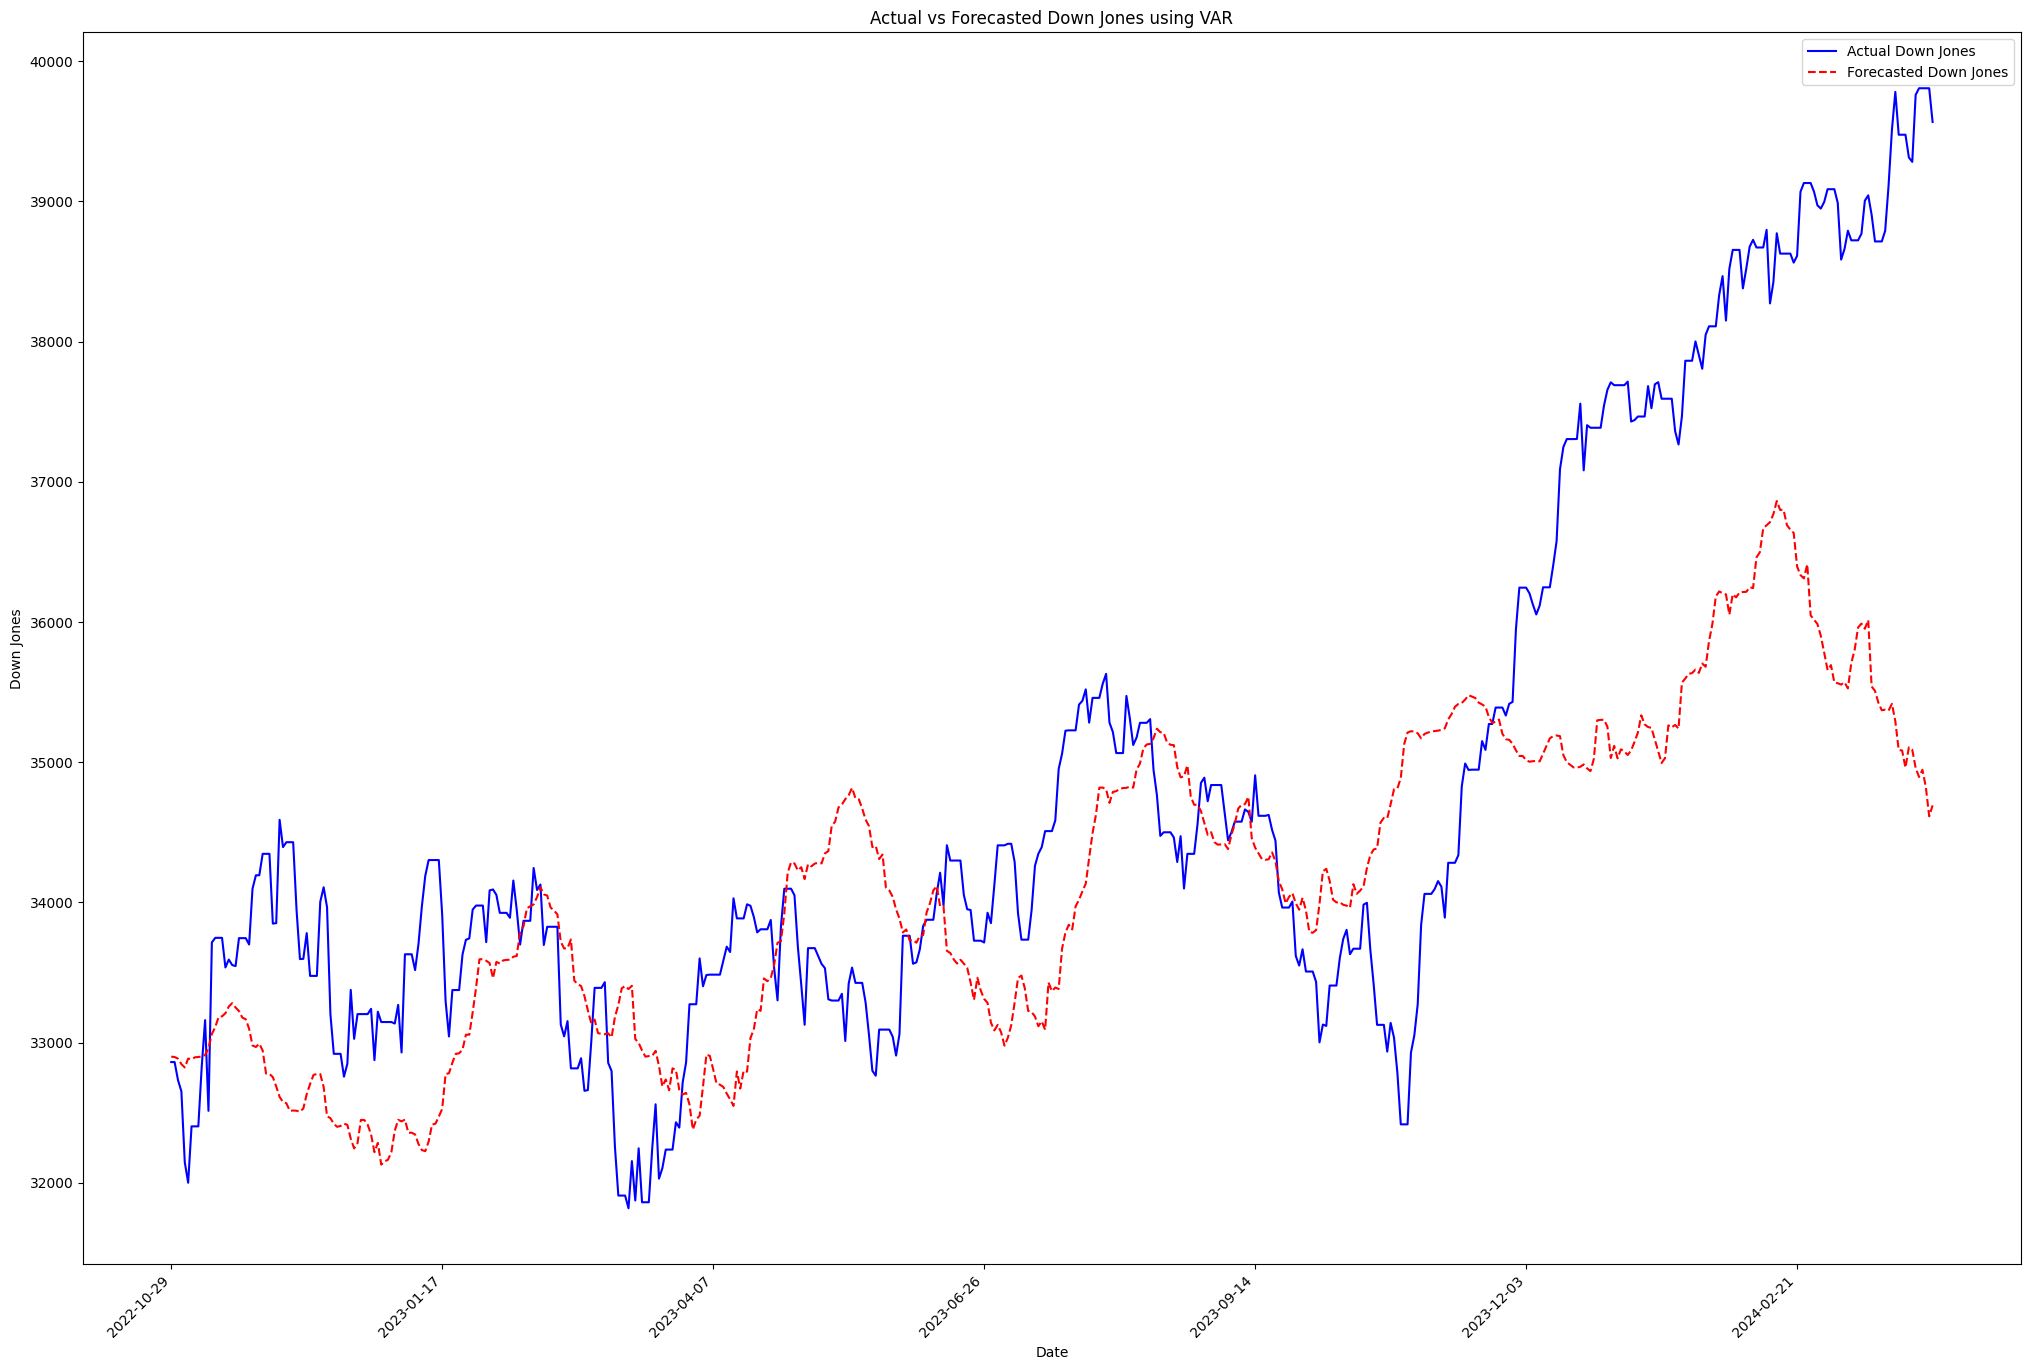

In [36]:
mae = mean_absolute_error(comparison_df_l2['Actual Down Jones'], comparison_df_l2['Forecasted Down Jones'])
print(f"MAE: {mae:.2f}")


mape = mean_absolute_percentage_error(comparison_df_l2['Actual Down Jones'], comparison_df_l2['Forecasted Down Jones'])
print(f"MAPE: {mape:.2f}%")


print("Dow Jones Actual vs Forecast:")
print(comparison_df_l2)

plt.figure(figsize=(25, 16))
plt.plot(comparison_df_l2['Date'], comparison_df_l2['Actual Down Jones'], label='Actual Down Jones', color='blue')
plt.plot(comparison_df_l2['Date'], comparison_df_l2['Forecasted Down Jones'], label='Forecasted Down Jones', color='red', linestyle='--')
plt.xticks(rotation=45, ha='right')
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(9)) 
plt.xlabel('Date')
plt.ylabel('Down Jones')
plt.title('Actual vs Forecasted Down Jones using VAR')
plt.legend()
plt.savefig('actual_vs_forecasted_dow_jones_VAR_nodiff_loop2.pdf', format='pdf')
plt.show()

## Loop 3

In [37]:
econ_weather_google_data.reset_index(inplace=True)

In [38]:
Date_col_l3 = econ_weather_google_data['Date'].tail(521) #dependet on the lentgh of the split_index

In [39]:
columns_l3 = econ_weather_google_data.columns[~econ_weather_google_data.columns.isin(['Date'])]

data_diff_l3 = econ_weather_google_data[columns_l3]

split_index_l3 = int(len(data_diff_l3) * 0.85) #this determines the lentgh of the forecast, according to this I can adjust the Date_col lentgh
train_data_l3 = data_diff_l3.iloc[:split_index_l3]
test_data_l3 = data_diff_l3.iloc[split_index_l3:]

model_l3 = VAR(train_data_l3)
results_l3 = model_l3.fit(maxlags=2157) #resulting from the grangercausalitytests --> for GDP = maxlags=87////2820

forecast_steps = len(test_data_l3)
forecast_l3 = results_l3.forecast(train_data_l3.values[-results_l3.k_ar:], steps=forecast_steps)


forecast_df_l3 = pd.DataFrame(forecast_l3, index=test_data_l3.index, columns=columns_l3)


dowjones_forecast_l3 = forecast_df_l3['Dow_Jones_Target']
dowjones_actual_l3 = test_data_l3['Dow_Jones_Target']

dates = data_diff_l3.index[split_index_l3:]


comparison_df_l3 = pd.DataFrame({'Date': Date_col_l3, 'Actual Down Jones': dowjones_actual_l3.values, 'Forecasted Down Jones': dowjones_forecast_l3.values}) #'Date': Date_col, 'Actual GDP': gdp_actual.values
comparison_df_l3.dropna(inplace=True)

MAE: 1243.95
MAPE: 0.04%
Dow Jones Actual vs Forecast:
            Date  Actual Down Jones  Forecasted Down Jones
2950  2022-10-29           32861.80           32651.774393
2951  2022-10-30           32861.80           32696.478502
2952  2022-10-31           32732.95           32633.088037
2953  2022-11-01           32653.20           32655.319740
2954  2022-11-02           32147.76           32758.157628
...          ...                ...                    ...
3466  2024-03-28           39807.37           35242.783589
3467  2024-03-29           39807.37           35306.532433
3468  2024-03-30           39807.37           35103.113480
3469  2024-03-31           39807.37           34893.385085
3470  2024-04-01           39566.85           35031.965722

[521 rows x 3 columns]


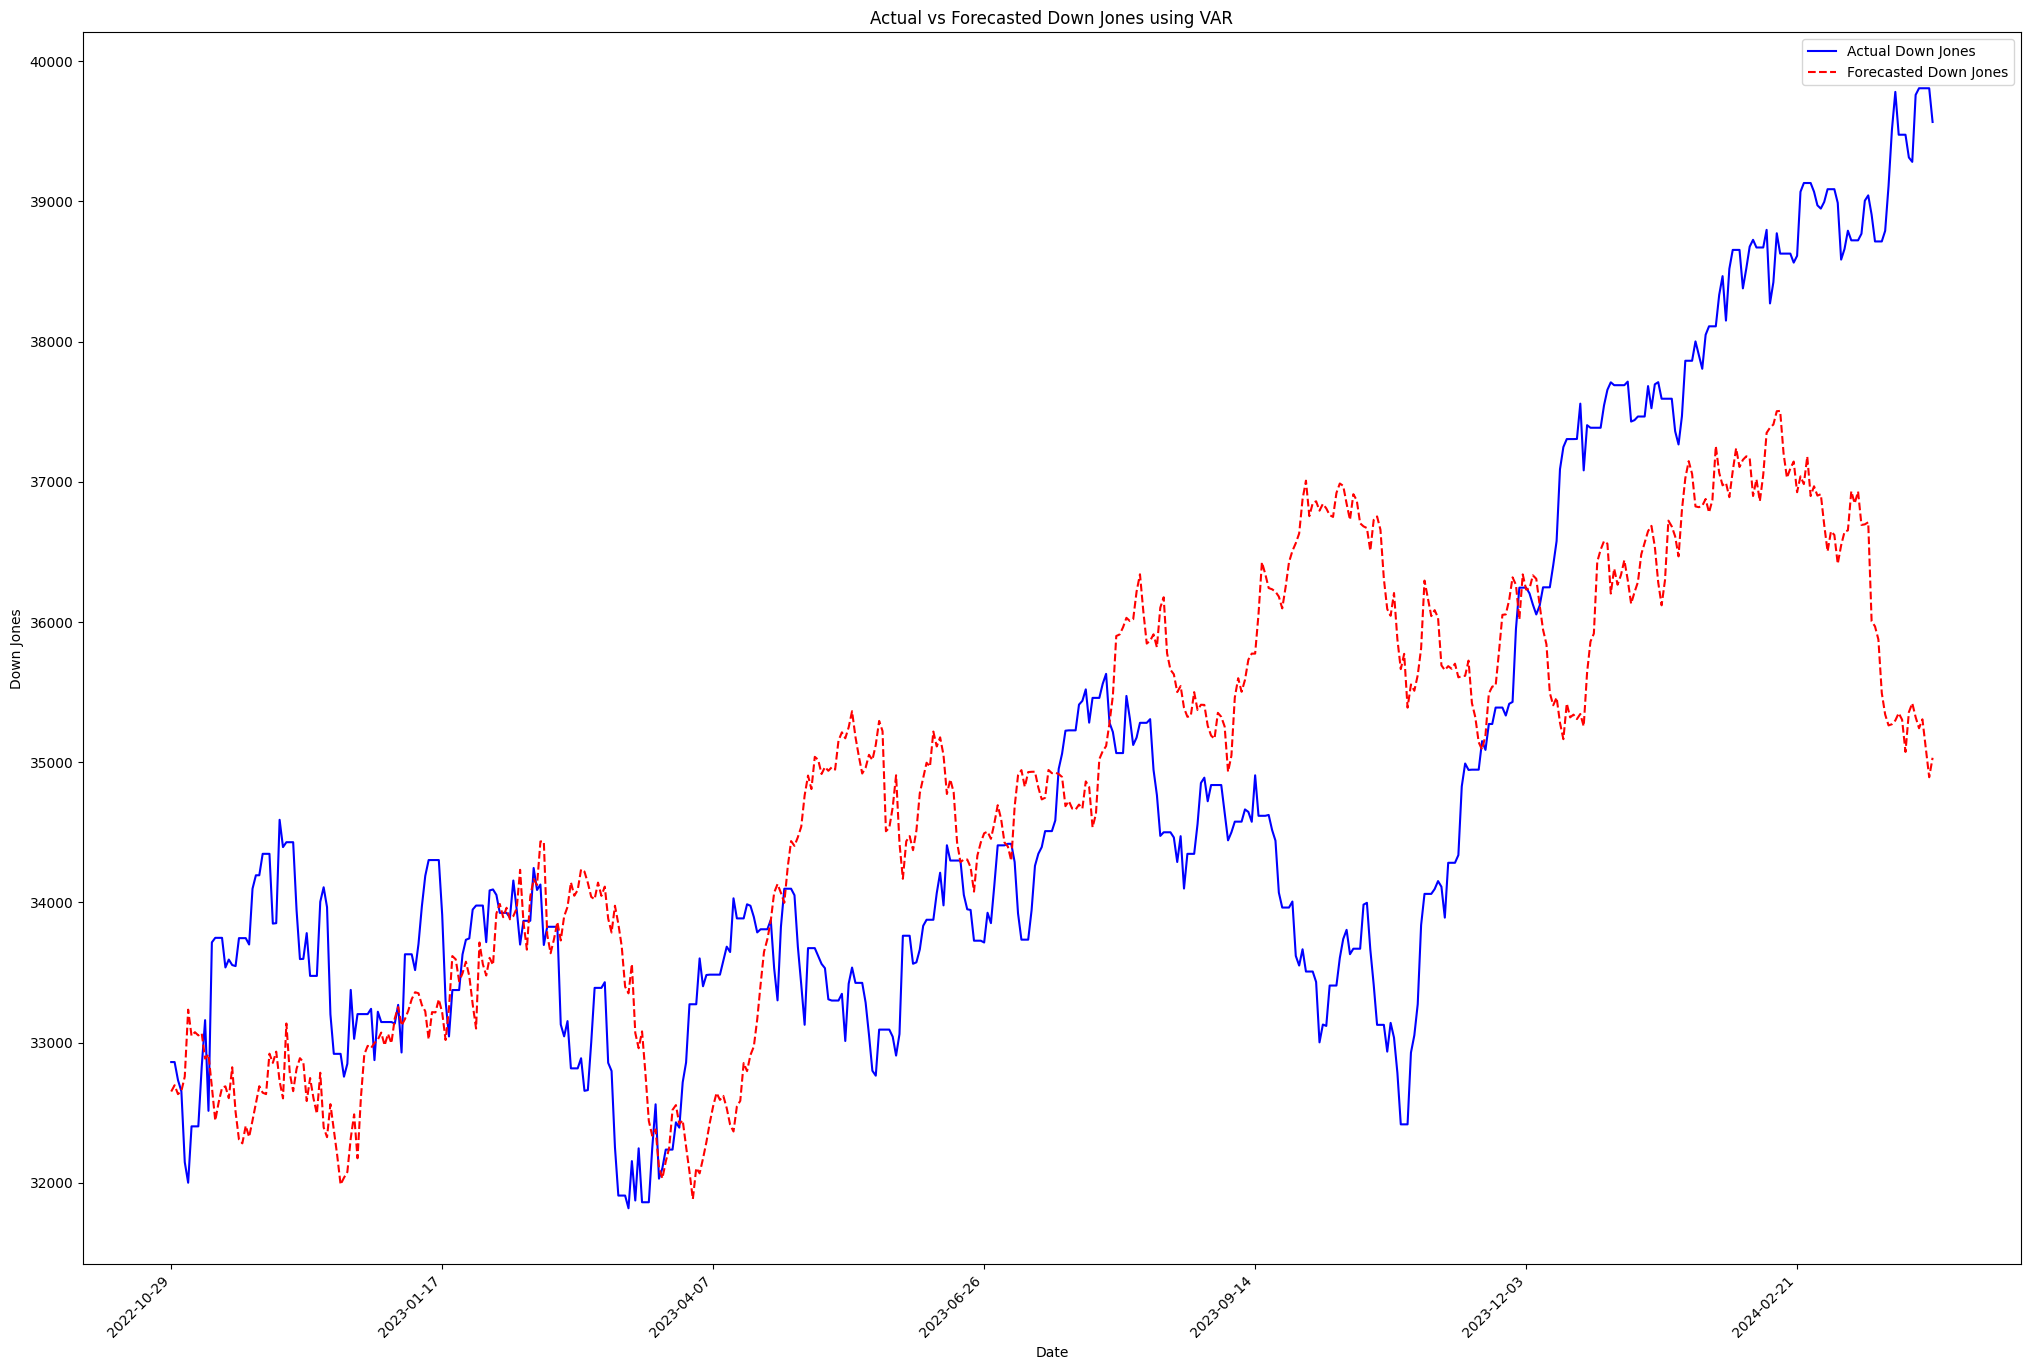

In [40]:
mae = mean_absolute_error(comparison_df_l3['Actual Down Jones'], comparison_df_l3['Forecasted Down Jones'])
print(f"MAE: {mae:.2f}")


mape = mean_absolute_percentage_error(comparison_df_l3['Actual Down Jones'], comparison_df_l3['Forecasted Down Jones'])
print(f"MAPE: {mape:.2f}%")


print("Dow Jones Actual vs Forecast:")
print(comparison_df_l3)

plt.figure(figsize=(25, 16))
plt.plot(comparison_df_l3['Date'], comparison_df_l3['Actual Down Jones'], label='Actual Down Jones', color='blue')
plt.plot(comparison_df_l3['Date'], comparison_df_l3['Forecasted Down Jones'], label='Forecasted Down Jones', color='red', linestyle='--')
plt.xticks(rotation=45, ha='right')
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(9)) 
plt.xlabel('Date')
plt.ylabel('Down Jones')
plt.title('Actual vs Forecasted Down Jones using VAR')
plt.legend()
plt.savefig('actual_vs_forecasted_dow_jones_VAR_nodiff_loop3.pdf', format='pdf')
plt.show()

## Loop 4

In [41]:
sentiment.reset_index(inplace=True)

In [42]:
Date_col_l4 = sentiment['Date'].tail(288) #dependet on the lentgh of the split_index

In [43]:
columns_l4 = sentiment.columns[~sentiment.columns.isin(['Date'])]

data_diff_l4 = sentiment[columns_l4]

split_index_l4 = int(len(data_diff_l4) * 0.85) #this determines the lentgh of the forecast, according to this I can adjust the Date_col lentgh
train_data_l4 = data_diff_l4.iloc[:split_index_l4]
test_data_l4 = data_diff_l4.iloc[split_index_l4:]

model_l4 = VAR(train_data_l4)
results_l4 = model_l4.fit(maxlags=1430) #resulting from the grangercausalitytests --> for GDP = maxlags=87////2820

forecast_steps = len(test_data_l4)
forecast_l4 = results_l4.forecast(train_data_l4.values[-results_l4.k_ar:], steps=forecast_steps)


forecast_df_l4 = pd.DataFrame(forecast_l4, index=test_data_l4.index, columns=columns_l4)


dowjones_forecast_l4 = forecast_df_l4['Dow_Jones_Target']
dowjones_actual_l4 = test_data_l4['Dow_Jones_Target']

dates = data_diff_l4.index[split_index_l4:]


comparison_df_l4 = pd.DataFrame({'Date': Date_col_l4, 'Actual Down Jones': dowjones_actual_l4.values, 'Forecasted Down Jones': dowjones_forecast_l4.values}) #'Date': Date_col, 'Actual GDP': gdp_actual.values
comparison_df_l4.dropna(inplace=True)

MAE: 1232.26
MAPE: 0.03%
Dow Jones Actual vs Forecast:
            Date  Actual Down Jones  Forecasted Down Jones
1630  2023-06-19           34299.12           34327.881957
1631  2023-06-20           34053.87           34352.976261
1632  2023-06-21           33951.52           34412.200586
1633  2023-06-22           33946.71           34510.115627
1634  2023-06-23           33727.43           34440.571078
...          ...                ...                    ...
1913  2024-03-28           39807.37           37152.219813
1914  2024-03-29           39807.37           37170.528887
1915  2024-03-30           39807.37           37282.958255
1916  2024-03-31           39807.37           37315.442551
1917  2024-04-01           39566.85           37320.510728

[288 rows x 3 columns]


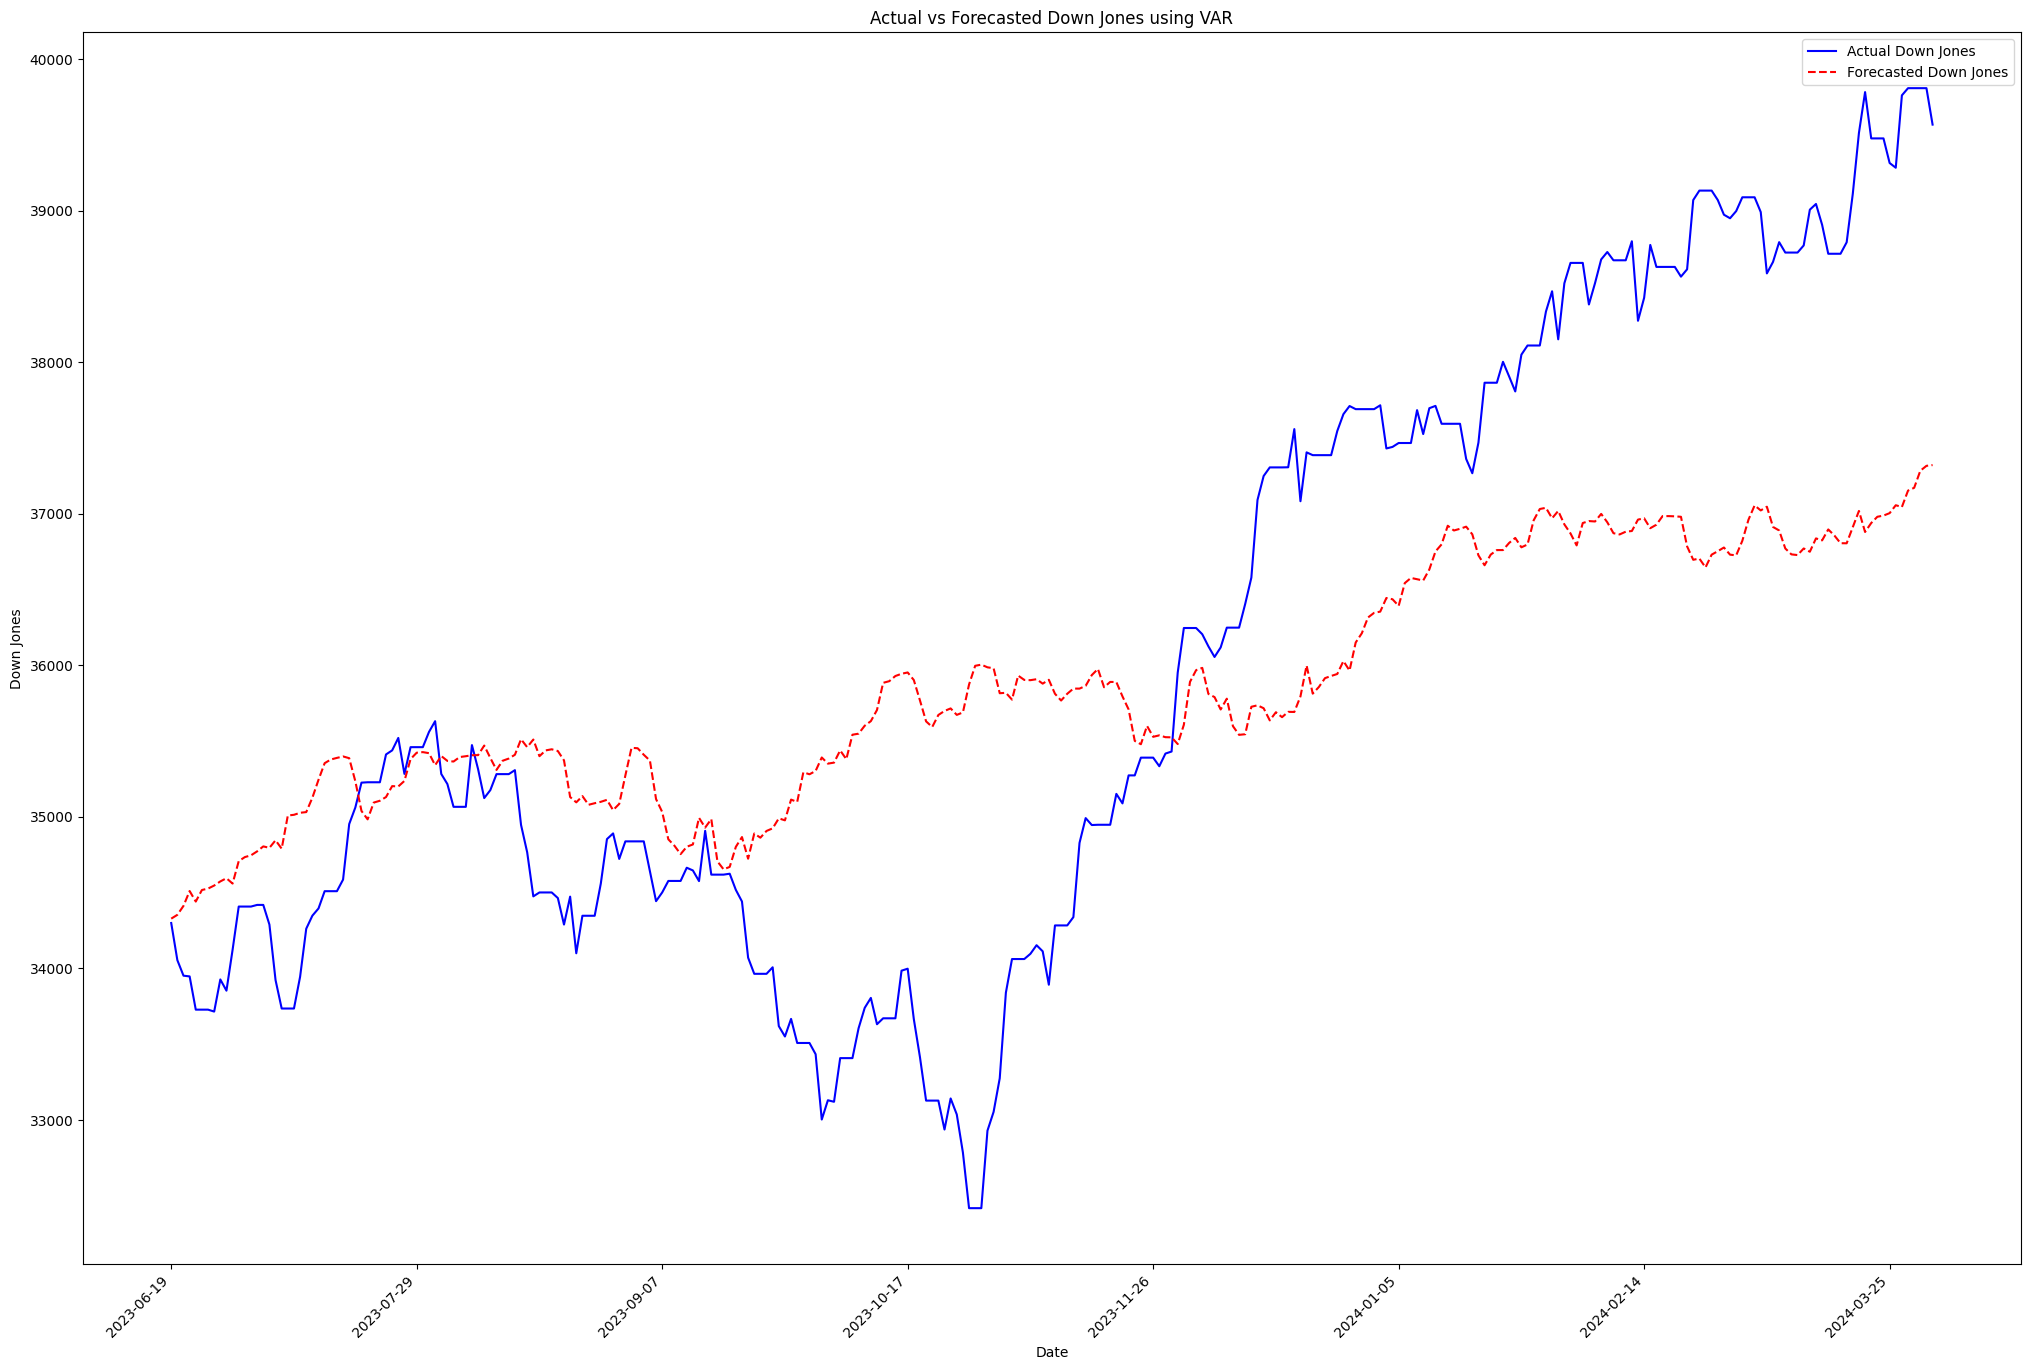

In [44]:
mae = mean_absolute_error(comparison_df_l4['Actual Down Jones'], comparison_df_l4['Forecasted Down Jones'])
print(f"MAE: {mae:.2f}")


mape = mean_absolute_percentage_error(comparison_df_l4['Actual Down Jones'], comparison_df_l4['Forecasted Down Jones'])
print(f"MAPE: {mape:.2f}%")


print("Dow Jones Actual vs Forecast:")
print(comparison_df_l4)

plt.figure(figsize=(25, 16))
plt.plot(comparison_df_l4['Date'], comparison_df_l4['Actual Down Jones'], label='Actual Down Jones', color='blue')
plt.plot(comparison_df_l4['Date'], comparison_df_l4['Forecasted Down Jones'], label='Forecasted Down Jones', color='red', linestyle='--')
plt.xticks(rotation=45, ha='right')
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(9)) 
plt.xlabel('Date')
plt.ylabel('Down Jones')
plt.title('Actual vs Forecasted Down Jones using VAR')
plt.legend()
plt.savefig('actual_vs_forecasted_dow_jones_VAR_nodiff_loop4.pdf', format='pdf')
plt.show()

## Visuals including all Loops

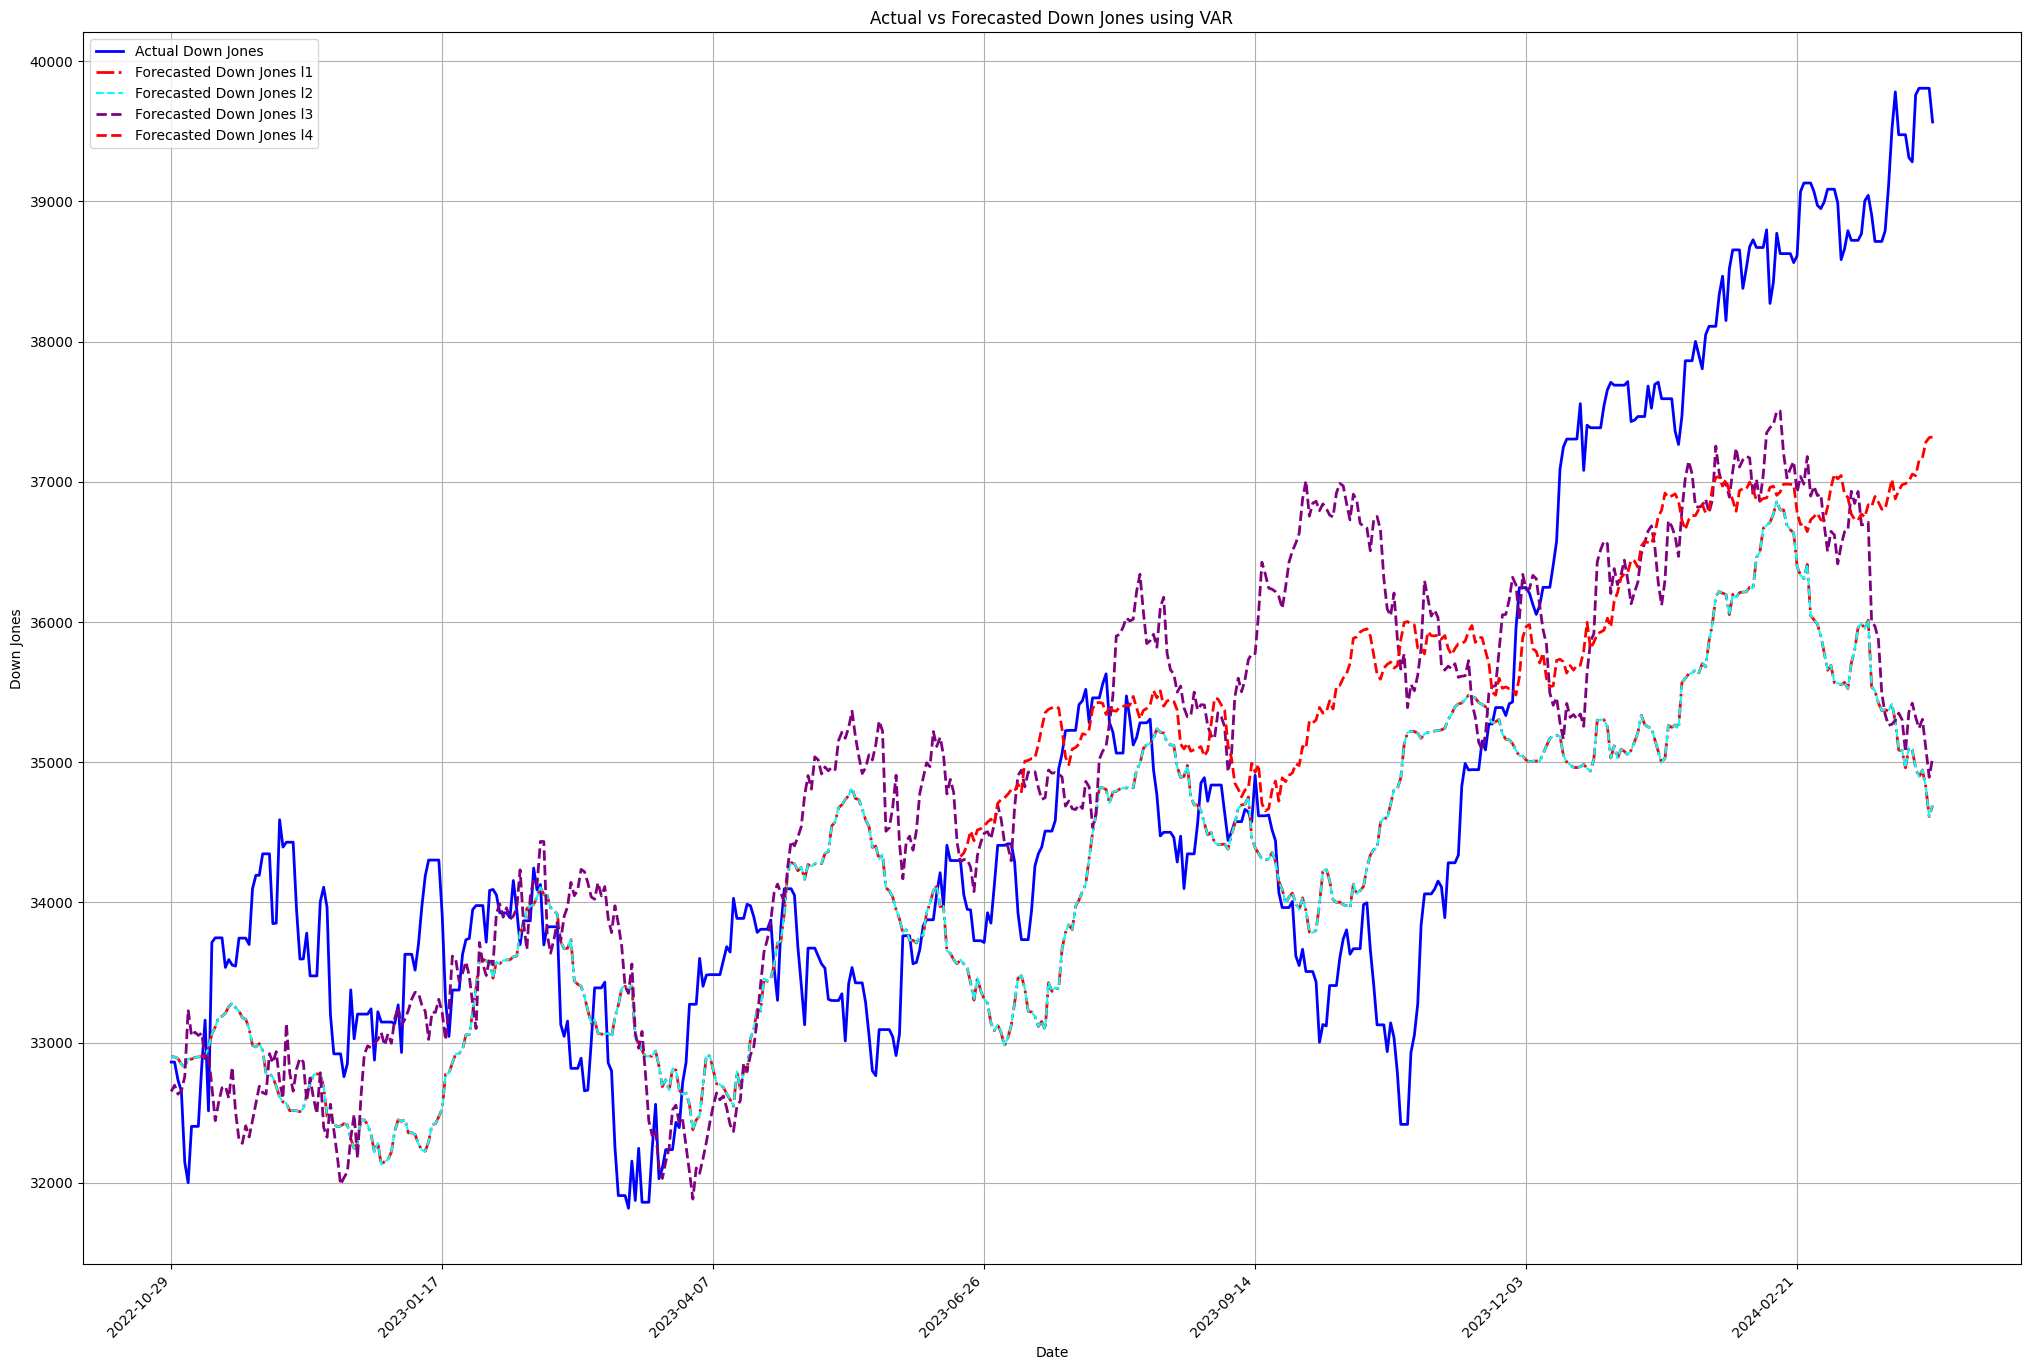

In [46]:

plt.figure(figsize=(25, 16))

# Plot actual values
sns.lineplot(data=comparison_df_l3, x='Date', y='Actual Down Jones', label='Actual Down Jones', color='blue', linewidth=2)

# Plot forecasted values from model l1
sns.lineplot(data=comparison_df_l1, x='Date', y='Forecasted Down Jones', label='Forecasted Down Jones l1', color='red', linestyle='-.', linewidth=2)

# Plot forecasted values from model l2
sns.lineplot(data=comparison_df_l2, x='Date', y='Forecasted Down Jones', label='Forecasted Down Jones l2', color='cyan', linestyle='--')

# Plot forecasted values from model l3
sns.lineplot(data=comparison_df_l3, x='Date', y='Forecasted Down Jones', label='Forecasted Down Jones l3', color='purple', linestyle='--', linewidth=2)

# Plot forecasted values from model l4
sns.lineplot(data=comparison_df_l4, x='Date', y='Forecasted Down Jones', label='Forecasted Down Jones l4', color='red', linestyle='--', linewidth=2)


plt.xticks(rotation=45, ha='right')
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(9))
plt.xlabel('Date')
plt.ylabel('Down Jones')
plt.title('Actual vs Forecasted Down Jones using VAR')
plt.legend()
plt.grid(True)


plt.savefig('actual_vs_forecasted_dow_jones_VAR_nodiff_all_models.pdf', format='pdf')


plt.show()

## Results

In [47]:
def evaluate_model(actual, forecasted, model_name):
    mae = mean_absolute_error(actual, forecasted)
    mse = mean_squared_error(actual, forecasted)
    rmse = np.sqrt(mse)
    mape = mean_absolute_percentage_error(actual, forecasted) * 100
    
    print(f'{model_name} Evaluation Metrics:')
    print(f'Mean Absolute Error (MAE): {mae}')
    print(f'Mean Squared Error (MSE): {mse}')
    print(f'Root Mean Squared Error (RMSE): {rmse}')
    print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')
    print('')

# Evaluate model l1
evaluate_model(comparison_df_l1['Actual Down Jones'], comparison_df_l1['Forecasted Down Jones'], 'Model l1')

# Evaluate model l2
evaluate_model(comparison_df_l2['Actual Down Jones'], comparison_df_l2['Forecasted Down Jones'], 'Model l2')

# Evaluate model l3
evaluate_model(comparison_df_l3['Actual Down Jones'], comparison_df_l3['Forecasted Down Jones'], 'Model l3')

# Evaluate model l4
evaluate_model(comparison_df_l4['Actual Down Jones'], comparison_df_l4['Forecasted Down Jones'], 'Model l4')

Model l1 Evaluation Metrics:
Mean Absolute Error (MAE): 1169.6284017699945
Mean Squared Error (MSE): 2394912.2897633533
Root Mean Squared Error (RMSE): 1547.5504159035831
Mean Absolute Percentage Error (MAPE): 3.25%

Model l2 Evaluation Metrics:
Mean Absolute Error (MAE): 1169.4741043339884
Mean Squared Error (MSE): 2394162.022217585
Root Mean Squared Error (RMSE): 1547.3079920357113
Mean Absolute Percentage Error (MAPE): 3.25%

Model l3 Evaluation Metrics:
Mean Absolute Error (MAE): 1243.9477393026082
Mean Squared Error (MSE): 2528346.7435605563
Root Mean Squared Error (RMSE): 1590.0775904214727
Mean Absolute Percentage Error (MAPE): 3.54%

Model l4 Evaluation Metrics:
Mean Absolute Error (MAE): 1232.258766579899
Mean Squared Error (MSE): 2187598.5012286613
Root Mean Squared Error (RMSE): 1479.0532448930503
Mean Absolute Percentage Error (MAPE): 3.41%

